## <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Analysis on Zomato </div></b>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Habib Python\python_new\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv("zomato.csv")

# Data Preprocessing


In [3]:
data.shape

(51717, 17)

In [4]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# remove useless columns from dataset
data.drop(columns=['url','address','phone','reviews_list'], inplace=True)

In [6]:
#remove duplicates from dataset
data.drop_duplicates(inplace=True)
data.shape

(51630, 13)

In [7]:
#rename some column names for ease in handling data  
data.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'listedin_type','listed_in(city)':'city'},
           inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51630 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           51630 non-null  object
 1   online_order   51630 non-null  object
 2   book_table     51630 non-null  object
 3   rate           43871 non-null  object
 4   votes          51630 non-null  int64 
 5   location       51609 non-null  object
 6   rest_type      51403 non-null  object
 7   dish_liked     23604 non-null  object
 8   cuisines       51585 non-null  object
 9   cost           51286 non-null  object
 10  menu_item      51630 non-null  object
 11  listedin_type  51630 non-null  object
 12  city           51630 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.5+ MB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,51630.0,283.317064,803.226524,0.0,7.0,41.0,198.0,16832.0


In [10]:
#remove errors and missing values from rate column
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def cleane_rate(r):

    if(r=="NEW" or r=="-"):
        return np.nan

    else:
        r=str(r).split('/')
        r=r[0]
        return float(r)
    
data.rate=data["rate"].apply(cleane_rate)
data.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
#replace all the null values in rate column with mean of column
data.rate.mean()

3.700233145054682

In [13]:
data.rate=data['rate'].round(2)

In [14]:
data['rate'] = data['rate'].fillna(data['rate'].mean())

In [15]:
data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location            21
rest_type          227
dish_liked       28026
cuisines            45
cost               344
menu_item            0
listedin_type        0
city                 0
dtype: int64

In [16]:
#convert cost dtype into float
data.cost=data['cost'].str.replace(',','').astype(float)
data.cost.head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

In [17]:
#replace null values with their mode from dish_liked column 
data['dish_liked'].mode()

0    Biryani
Name: dish_liked, dtype: object

In [18]:
data['dish_liked']=data['dish_liked'].fillna('Biryani')

In [19]:
data.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location          21
rest_type        227
dish_liked         0
cuisines          45
cost             344
menu_item          0
listedin_type      0
city               0
dtype: int64

In [20]:
#remove all nan values from dataset that are less than 1000
data.dropna(inplace=True)

In [21]:
data.isnull().sum()

name             0
online_order     0
book_table       0
rate             0
votes            0
location         0
rest_type        0
dish_liked       0
cuisines         0
cost             0
menu_item        0
listedin_type    0
city             0
dtype: int64

In [22]:
data.shape

(51063, 13)

In [23]:
data.name.unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [24]:
data.shape[0]

51063

In [25]:
#total number of restaurants
#most popular restaurant in dataset and its count
data['name'].describe()

count               51063
unique               8723
top       Cafe Coffee Day
freq                   96
Name: name, dtype: object

In [26]:
print(f'Total number of restaurants in the dataset:', data.name.count())

Total number of restaurants in the dataset: 51063


In [27]:
#Total number of restaurants that offer online order: 30249
data['online_order'].describe()

count     51063
unique        2
top         Yes
freq      30249
Name: online_order, dtype: object

In [28]:
table_booking= data[data['book_table']=='Yes']
print(f'Total number of restaurants that offer online booking of table:',table_booking['book_table'].count())

Total number of restaurants that offer online booking of table: 6422


# Data Visualization

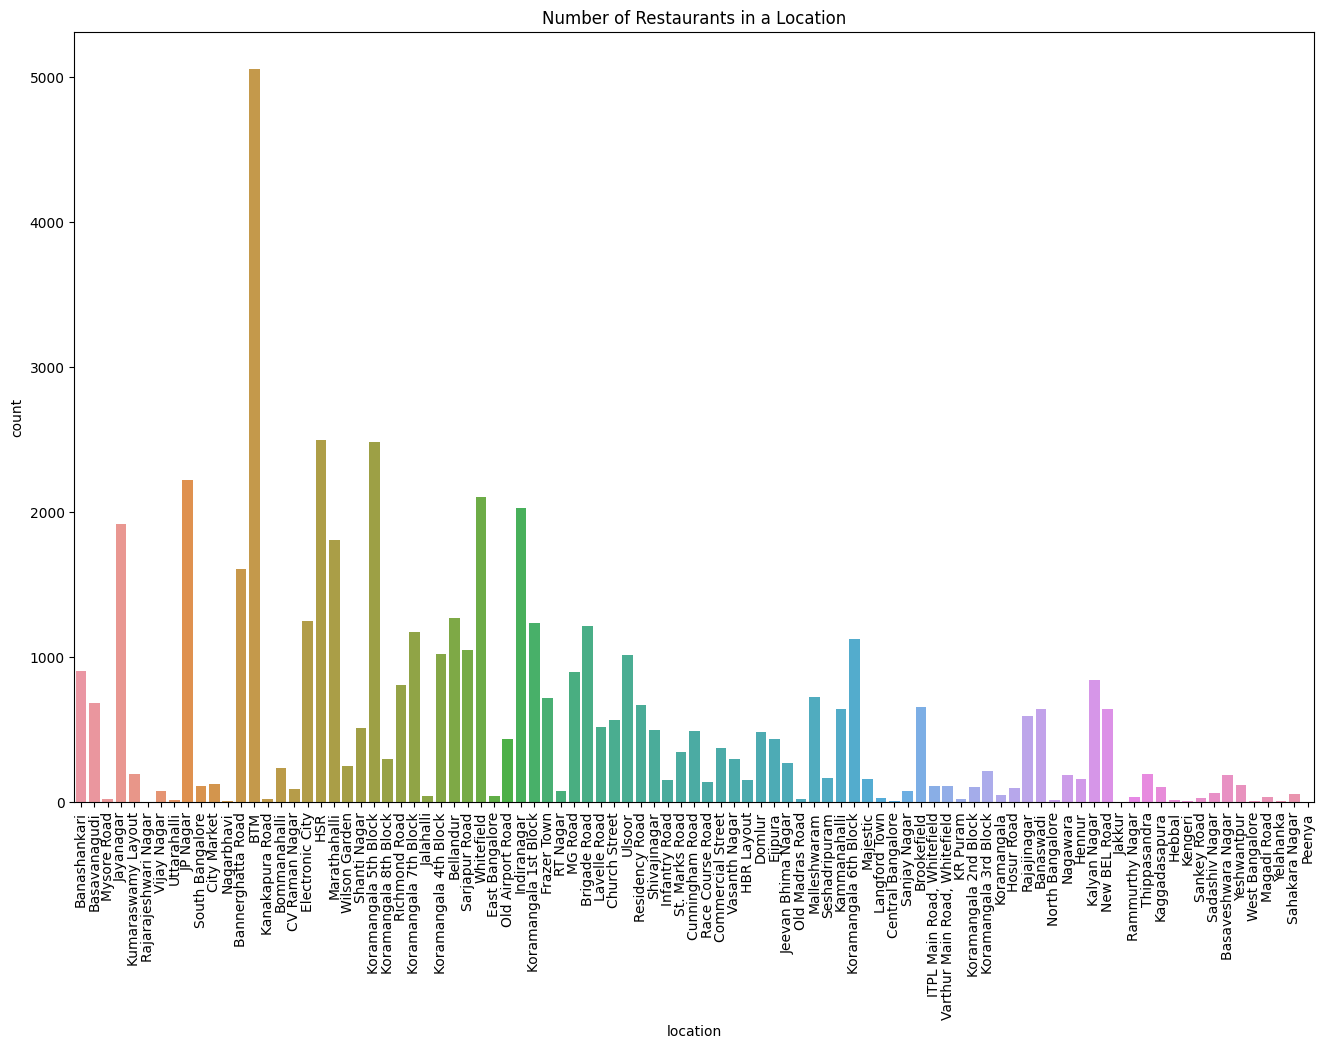

In [29]:
plt.figure(figsize=(16,10))
sns.countplot(x=data['location'])
plt.title('Number of Restaurants in a Location')
plt.xticks(rotation=90);

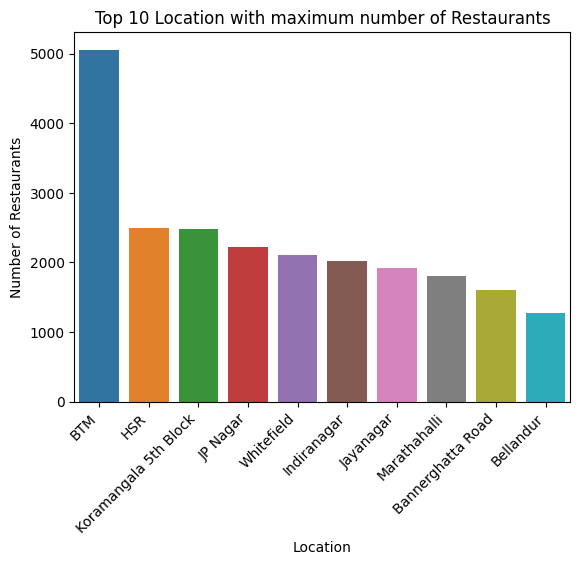

In [30]:
top_locations=data.location.value_counts(ascending=False).head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Location with maximum number of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants');

In [31]:
data.rate.value_counts(ascending=False).head()

3.700233    9858
3.900000    3953
3.800000    3816
3.700000    3803
3.600000    3283
Name: rate, dtype: int64

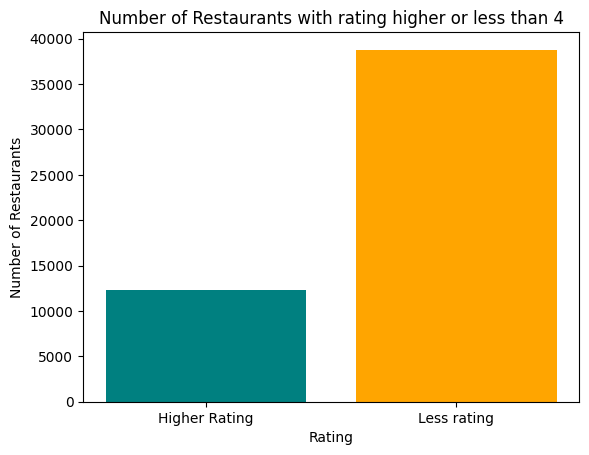

In [32]:
# Count number of restaurants in each rating category
high_rating= (data['rate'] >= 4).sum()
less_rating= (data['rate'] < 4).sum()

# Create bar chart
plt.bar(['Higher Rating', 'Less rating'], [high_rating, less_rating], color=['teal','orange'])
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants with rating higher or less than 4')
plt.show()


In [33]:
data.groupby('name')['votes'].max().sort_values(ascending=False).head(10)

name
Byg Brewski Brewing Company    16832
Toit                           14956
Truffles                       14726
AB's - Absolute Barbecues      12121
The Black Pearl                10550
Big Pitcher                     9300
Onesta                          9085
Arbor Brewing Company           8419
Empire Restaurant               8304
Prost Brew Pub                  7871
Name: votes, dtype: int64

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


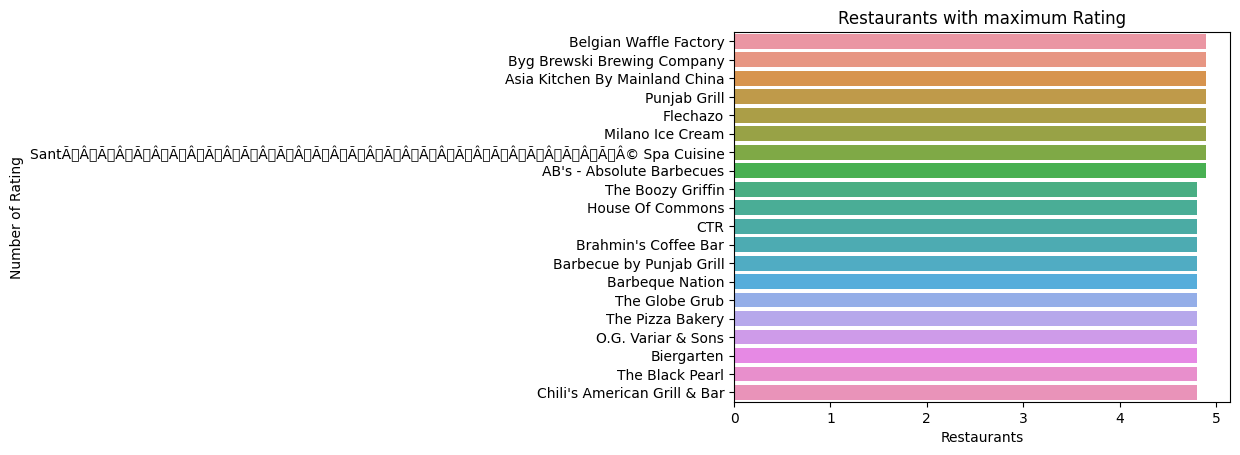

In [34]:
top_rating= data.groupby('name')['rate'].max().sort_values(ascending=False).head(20)
sns.barplot(y=top_rating.index,x=top_rating.values)
plt.title('Restaurants with maximum Rating')
plt.xlabel('Restaurants')
plt.ylabel('Number of Rating');

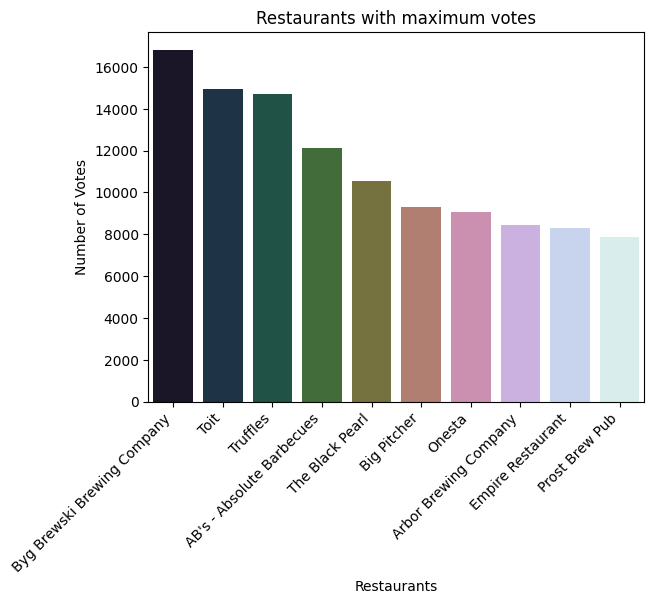

In [35]:
top_votes= data.groupby('name')['votes'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="cubehelix" )
plt.xticks(rotation=45,ha='right')
plt.title('Restaurants with maximum votes')
plt.xlabel('Restaurants')
plt.ylabel('Number of Votes');

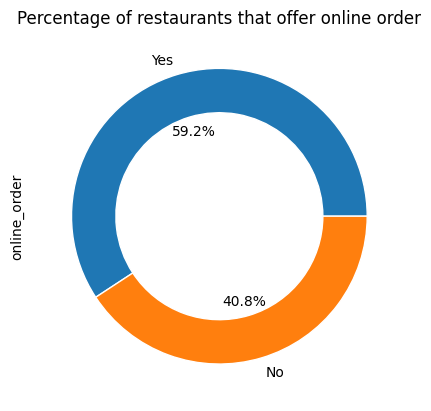

In [36]:
data["online_order"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that offer online order');

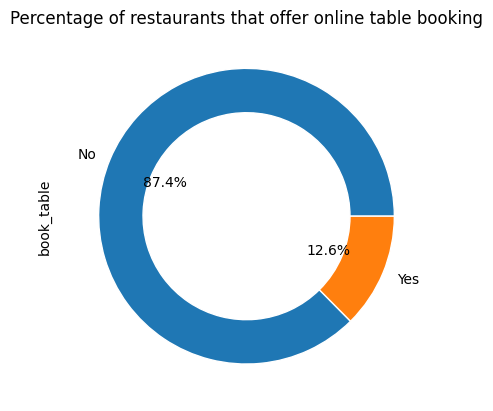

In [37]:
data["book_table"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of restaurants that offer online table booking');

Text(0.5, 1.0, 'Rating with table booking')

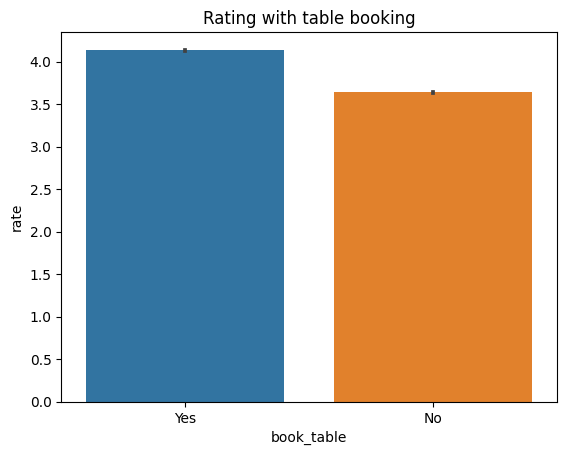

In [38]:
sns.barplot(x=data['book_table'], y=data['rate'])
plt.title('Rating with table booking')

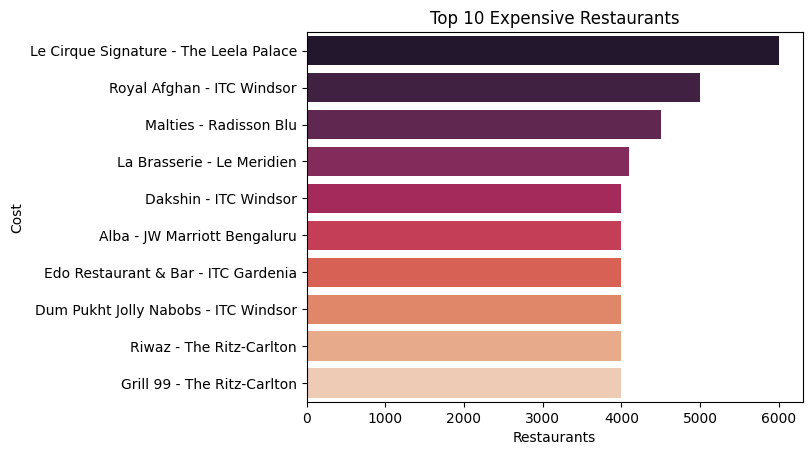

In [39]:
top_exp=data.groupby('name')['cost'].max().sort_values(ascending= False).head(10)
sns.barplot(y=top_exp.index, x=top_exp.values,palette="rocket")
plt.title('Top 10 Expensive Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Cost');

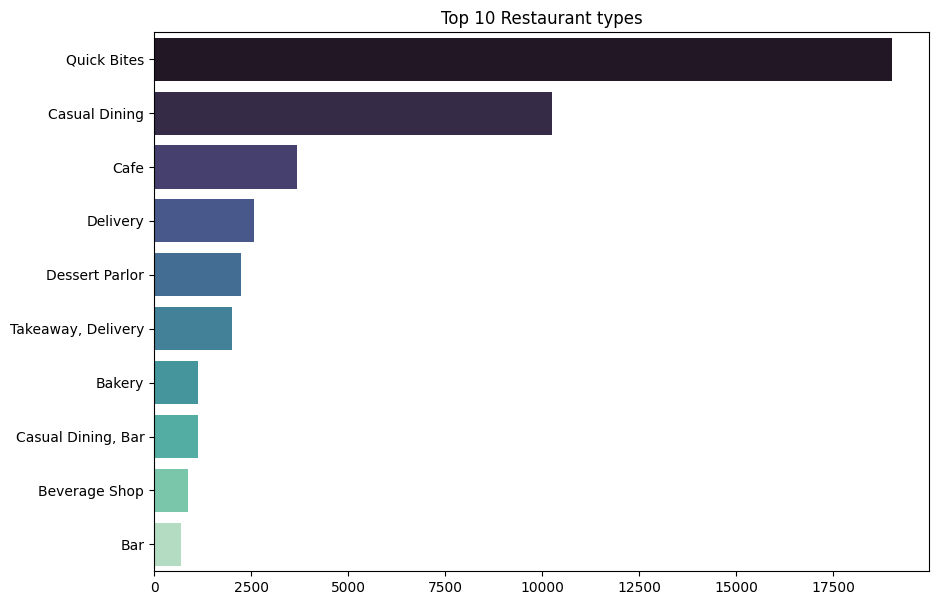

In [40]:
top_types=data.rest_type.value_counts(ascending=False).head(10)
plt.figure(figsize=(10,7))
sns.barplot(x=top_types.values, y=top_types.index,palette='mako')
plt.title('Top 10 Restaurant types');

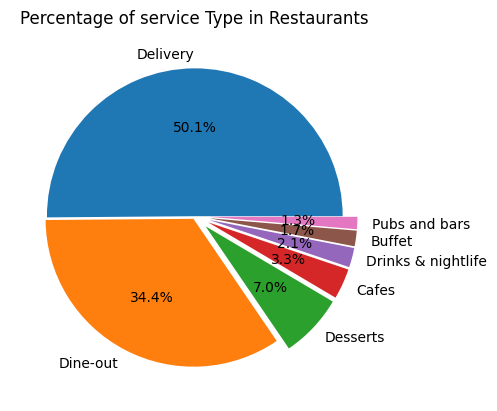

In [41]:
restaurant_count=data.listedin_type.value_counts()
# create pie chart to visualize the percentage of each type of restaurant
plt.pie(restaurant_count, labels=restaurant_count.index, explode=[0,0.02,0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%')

# Add title
plt.title('Percentage of service Type in Restaurants')

# Display the chart
plt.show()

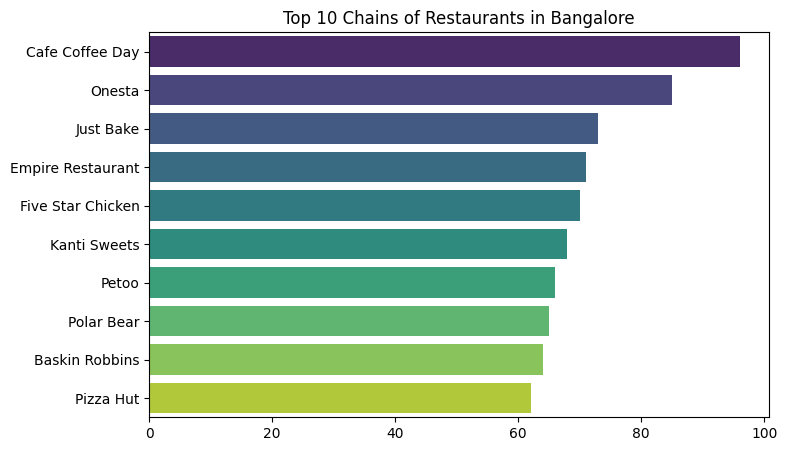

In [42]:
top_rest=data.name.value_counts(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rest.values, y=top_rest.index,palette="viridis",)
plt.title('Top 10 Chains of Restaurants in Bangalore');

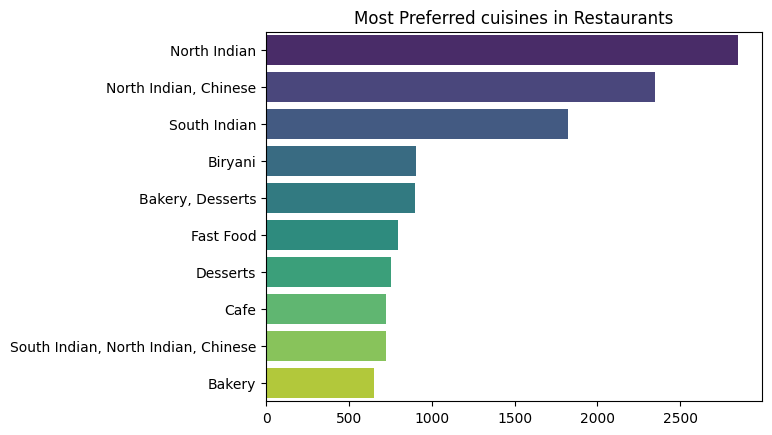

In [43]:
cuisines=data["cuisines"].value_counts(ascending=False).head(10)
sns.barplot(y=cuisines.index, x=cuisines.values,palette="viridis")
plt.title('Most Preferred cuisines in Restaurants');

In [44]:
data.to_csv('Zomato clean.csv')

## Analysis Report
- Most common service type of restaurants is Delivery followed by Dine-out.
- Most common type of meal restaurant in  Bangalore is Quick Bites and Casual Dining.
- Top Location that have maximum number of restaurant is BTM followed by HR and Koramangala 5th Block
- Around 12277 restaurants have rating higher or equal to 4 and 38786 restaurants have rating less than 4
- Some of the Highest rated restaurants include Belgian Waffle Factory, Byg Brewski Brewing Company and some others.
- Top Restaurant with maximum number of voting are Byg Brewski Brewing Company followed by Toit and Truffles.
- Around 59.2% restaurants offer online ordering.
- Mojarity of the restaurants that is 87.4% does'nt offer online table booking.
- Most expensive restaurant in Bangalore is Le Cirque Signature - The Leela Palace that cost around 6000 for two people.
- It predicts from the dataset that retaurants with low-cost are likely to get maximum rating
- Majority of the restaurants get highest rating that offer online table booking.
- Restaurants get highest rating that offer online ordering system.
- Most Chains of Restaurant in Bangalore is Cafe Coffee Day and Onesta.
